In [1]:
# Using Fashioanyn MNIST in a Convolutional Neural Network
# This time done with fucntional API

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dropout, Dense, Conv2D, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [10]:
# Import data

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
# Scaling

X_train = X_train/X_train.max()

In [13]:
X_test = X_test/X_test.max()

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
# Need extra dimension -> do this with np.expand_dims(...,-1)

In [17]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [20]:
print(X_train.shape , X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [34]:
# Finding numper of unique classes

n_classes = np.unique(y_train)
print(f" There are {len(n_classes)} unique classes in dataset!")

 There are 10 unique classes in dataset!


In [35]:
# Shape of input

X_train[0].shape

(28, 28, 1)

In [41]:
# Making model using functional API

i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense((len(n_classes)), activation = 'softmax')(x)

model = Model(i,x)

In [45]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3611 - accuracy: 0.8636 - val_loss: 0.3508 - val_accuracy: 0.8664
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3084 - accuracy: 0.8847 - val_loss: 0.3248 - val_accuracy: 0.8806
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2746 - accuracy: 0.8975 - val_loss: 0.3009 - val_accuracy: 0.8880
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2494 - accuracy: 0.9061 - val_loss: 0.2988 - val_accuracy: 0.8929
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2289 - accuracy: 0.9128 - val_loss: 0.2848 - val_accuracy: 0.8960
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2103 - accuracy: 0.9203 - val_loss: 0.3001 - val_accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1924 - accuracy: 0.9269 - val_loss: 0.2931 -

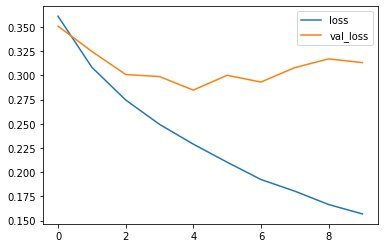

In [50]:
# Plotting losses
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [51]:
# Perhaps some overfitting?

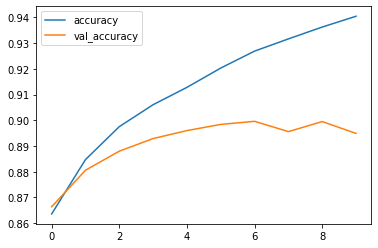

In [52]:
# Plotting accuracies
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [53]:
# Model being more and more confident in incorrect predictions?

In [58]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def confusion_matrix_plot(cm, classes,
                         normalize = False,
                         title ='Confusion Matrix',
                         cmap = plt.cm.Blues):
    '''
    This function plots the confusion matrix. Import to any system with multi-label classification
    '''

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Non-normalized confusion matrix")
    print(cm)
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                horizontalalignment='center',
                color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show

Non-normalized confusion matrix
[[798   2  19  36   3   1 135   0   6   0]
 [  3 976   0  14   3   0   3   0   1   0]
 [ 17   1 801  42  51   0  85   0   3   0]
 [  7   7  11 933  18   0  23   0   1   0]
 [  1   1  56  43 821   0  78   0   0   0]
 [  0   0   0   2   0 977   0  12   1   8]
 [ 75   1  52  36  71   0 751   0  14   0]
 [  0   0   0   0   0  18   0 959   1  22]
 [  3   0   4   4   1   5   5   3 975   0]
 [  1   0   0   0   0   6   1  33   1 958]]


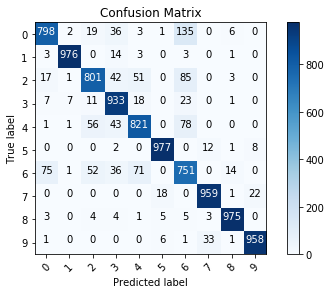

In [61]:
p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
confusion_matrix_plot(cm, list(range(10)))

Text(0.5, 1.0, 'True label = Pullover, Predicted label = Coat')

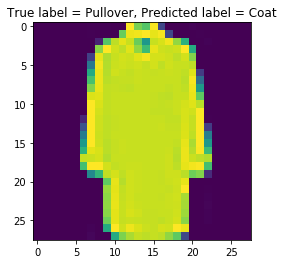

In [64]:
# Plotting misclassified samples
labels = '''
T-shirt/top
Trousers
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot
'''.split()


misclass_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclass_index)
plt.imshow(X_test[i].reshape(28,28))
plt.title(f"True label = {labels[y_test[i]]}, Predicted label = {labels[p_test[i]]}")

Text(0.5, 1.0, 'True label = Coat, Predicted label = Pullover')

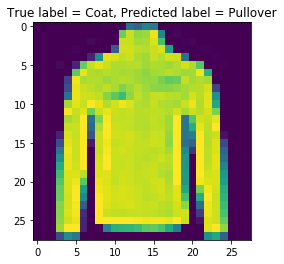

In [65]:
misclass_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclass_index)
plt.imshow(X_test[i].reshape(28,28))
plt.title(f"True label = {labels[y_test[i]]}, Predicted label = {labels[p_test[i]]}")

Text(0.5, 1.0, 'True label = T-shirt/top, Predicted label = Shirt')

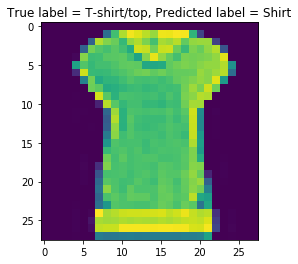

In [66]:
misclass_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclass_index)
plt.imshow(X_test[i].reshape(28,28))
plt.title(f"True label = {labels[y_test[i]]}, Predicted label = {labels[p_test[i]]}")

In [ ]:
# Seems easy enough to confuse!